In [83]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [69]:
y = df.charges
X = df.iloc[:, :-1]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)


scaler = preprocessing.StandardScaler()
scaler.fit(X_train) # learning mean and std for each column
X_train_std = scaler.transform(X_train) # calculating the z-value = (x - x_mean)/std_x .. column wise
X_test_std = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train_std, y_train) # model or the qualtion is formed
y_train_pred = est.predict(X_train_std)
y_test_pred = est.predict(X_test_std)








X_train (936, 8) X_test (402, 8)


In [50]:
936 / (936+402)

0.6995515695067265

In [47]:
np.random.seed(1234)
np.random.randn(3)

array([ 0.47143516, -1.19097569,  1.43270697])

In [60]:
res = pd.DataFrame({"actual": y_test, "predicted": y_test_pred})
res["error"] = res.predicted - res.actual
sse = np.sum(res.error ** 2)
sse

14778105453.509336

In [62]:
mse = sse / len(y_test)
mse

36761456.352013275

In [63]:
rmse = np.sqrt(mse)
rmse

6063.122656850452

In [64]:
np.std(y_test)

11904.481211649017

In [65]:
sst = np.sum((np.mean(y_train) - y_test) ** 2)

sst

56970277938.44924

In [66]:
sse/sst

0.2594002695488974

In [68]:
R2 = 1 - sse/sst
R2

0.7405997304511026

In [76]:
target = "charges"
y = df[target]
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)



pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (936, 8) X_test (402, 8)

training mse 36476790.76410686 
test mse 36761456.352013275 
training R2 0.7545557492633161 
test R2 0.7405989316927211


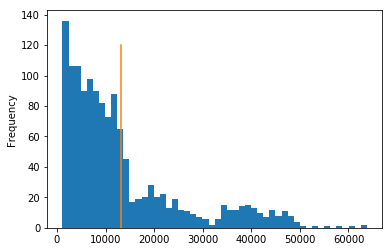

In [87]:
df.charges.plot.hist(bins = 50)
charges_mean = df.charges.mean()
plt.plot([charges_mean, charges_mean], [0, 120])

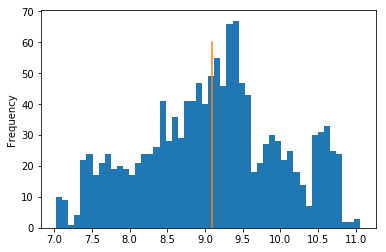

In [88]:
np.log(df.charges).plot.hist(bins = 50)
charges_mean = np.log(df.charges).mean()
plt.plot([charges_mean, charges_mean], [0, 60])

In [98]:
target = "charges"
y = df[target]
#y = np.log(df[target])
X = df.copy()
del X[target]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                        test_size = 0.3, random_state = 1)
print("X_train", X_train.shape, "X_test", X_test.shape)



pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("\ntraining mse", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntest mse", metrics.mean_squared_error(y_test, y_test_pred),
      "\ntraining R2", metrics.r2_score(y_train, y_train_pred),
      "\ntest R2", metrics.r2_score(y_test, y_test_pred)
     )

X_train (936, 8) X_test (402, 8)

training mse 36476790.76410686 
test mse 36761456.352013275 
training R2 0.7545557492633161 
test R2 0.7405989316927211


In [102]:
est = pipe.steps[-1][-1]
pd.DataFrame({"feature": X.columns, "coef": est.coef_})

,coef,feature
0,3528.982731,age
1,1961.655208,bmi
2,421.550164,children
3,-141.359110,sex_male
4,9733.786883,smoker_yes
5,-129.545886,region_northwest
6,-414.541483,region_southeast
7,-379.095344,region_southwest


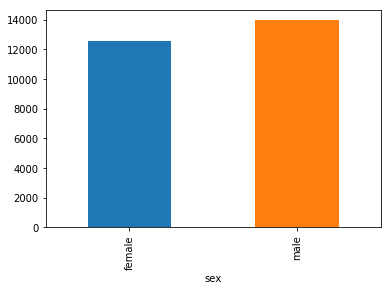

In [104]:
df.groupby("sex").charges.mean().plot.bar()

In [106]:
np.corrcoef(y, df.bmi)

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

In [107]:
np.corrcoef(y, df.age)

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [108]:
np.corrcoef(y, df.children)

array([[1.        , 0.06799823],
       [0.06799823, 1.        ]])

In [109]:
est.intercept_

13276.698553898505